In [ ]:
import pandas as pd

In [ ]:
# Load the uploaded data'
data = pd.read_csv('/content/Ola_Sample_Data.csv')
data

,Trip ID,Date,Time,City,Pickup Location,Drop-off Location,Distance (km),Fare (INR),Surge Pricing Applied,Driver ID,Driver Name,Driver Rating,Customer ID,Customer Rating,Payment Method
0,TRIP_0001,04-03-2024,9:49:00,Chennai,Location_5,Location_16,8.74,166.78,True,DRIVER_003,Driver_12,4.3,CUSTOMER_020,4.1,Credit Card
1,TRIP_0002,07-02-2024,8:56:00,Hyderabad,Location_9,Location_14,19.11,364.67,True,DRIVER_009,Driver_6,4.3,CUSTOMER_004,3.8,Cash
2,TRIP_0003,06-02-2024,8:00:00,Delhi,Location_8,Location_14,15.18,289.67,False,DRIVER_010,Driver_20,4.5,CUSTOMER_007,4.8,Credit Card
3,TRIP_0004,05-05-2024,9:02:00,Hyderabad,Location_9,Location_14,12.78,243.88,False,DRIVER_014,Driver_13,4.6,CUSTOMER_001,3.2,Cash
4,TRIP_0005,18-05-2024,8:54:00,Bangalore,Location_10,Location_12,4.81,91.79,True,DRIVER_011,Driver_20,5.0,CUSTOMER_044,4.0,Credit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Trip_0151,30-03-2024,10:01:00,NaN,NaN,Location_21,NaN,NaN,NaN,DRIVER_019,NaN,NaN,NaN,NaN,NaN
151,TRIP_0152,NaN,NaN,NaN,NaN,Location_14,NaN,NaN,NaN,DRIVER_020,NaN,NaN,NaN,NaN,NaN
152,TRIP_0153,NaN,NaN,NaN,NaN,Location_16,NaN,NaN,NaN,DRIVER_021,NaN,NaN,NaN,NaN,NaN
153,TRIP_0154,NaN,NaN,NaN,NaN,Location_20,NaN,NaN,NaN,DRIVER_022,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Display the first few rows of the data
data.head()

,Trip ID,Date,Time,City,Pickup Location,Drop-off Location,Distance (km),Fare (INR),Surge Pricing Applied,Driver ID,Driver Name,Driver Rating,Customer ID,Customer Rating,Payment Method
0,TRIP_0001,04-03-2024,9:49:00,Chennai,Location_5,Location_16,8.74,166.78,True,DRIVER_003,Driver_12,4.3,CUSTOMER_020,4.1,Credit Card
1,TRIP_0002,07-02-2024,8:56:00,Hyderabad,Location_9,Location_14,19.11,364.67,True,DRIVER_009,Driver_6,4.3,CUSTOMER_004,3.8,Cash
2,TRIP_0003,06-02-2024,8:00:00,Delhi,Location_8,Location_14,15.18,289.67,False,DRIVER_010,Driver_20,4.5,CUSTOMER_007,4.8,Credit Card
3,TRIP_0004,05-05-2024,9:02:00,Hyderabad,Location_9,Location_14,12.78,243.88,False,DRIVER_014,Driver_13,4.6,CUSTOMER_001,3.2,Cash
4,TRIP_0005,18-05-2024,8:54:00,Bangalore,Location_10,Location_12,4.81,91.79,True,DRIVER_011,Driver_20,5.0,CUSTOMER_044,4.0,Credit Card


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler




In [ ]:
# Preprocess the data: Aggregate customer metrics
# Calculate total trips, total distance, total fare, and average surge application by customer
customer_data = data.groupby('Customer ID').agg({
    'Trip ID': 'count',              # Total number of trips
    'Distance (km)': 'sum',          # Total distance covered
    'Fare (INR)': 'sum',             # Total fare spent
    'Surge Pricing Applied': 'mean'  # Proportion of trips with surge pricing
}).rename(columns={'Trip ID': 'Total Trips', 'Distance (km)': 'Total Distance (km)',
                   'Fare (INR)': 'Total Fare (INR)', 'Surge Pricing Applied': 'Surge Usage Rate'})



In [ ]:
# Feature Engineering: Scaling the features
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)
customer_data['Segment'] = kmeans.fit_predict(customer_data_scaled)

# Show sample of segmented data
customer_data.head()

,Total Trips,Total Distance (km),Total Fare (INR),Surge Usage Rate,Segment
Customer ID,,,,,
CUSTOMER_001,1,12.78,243.88,0.0,0
CUSTOMER_002,4,36.61,698.61,0.25,1
CUSTOMER_003,5,80.55,1537.11,0.2,3
CUSTOMER_004,4,38.40,732.78,0.5,1
CUSTOMER_005,3,28.06,535.46,0.333333,1


In [ ]:
# Segment profiling: Calculate the average metrics for each segment
segment_profile = customer_data.groupby('Segment').mean().round(2)

# Show the segment profiles
segment_profile


,Total Trips,Total Distance (km),Total Fare (INR),Surge Usage Rate
Segment,,,,
0,1.91,17.67,337.12,0.0
1,3.79,36.45,695.48,0.266667
2,2.00,21.19,404.32,0.730769
3,5.17,69.10,1318.62,0.258333


<ipython-input-14-19c46c31825b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_profile.index, y='Total Trips', data=segment_profile, ax=axes[0, 0], palette="viridis")
<ipython-input-14-19c46c31825b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_profile.index, y='Total Distance (km)', data=segment_profile, ax=axes[0, 1], palette="viridis")
<ipython-input-14-19c46c31825b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_profile.index, y='Total Fare (INR)', data=segment_profile, ax=axes[1, 0], palette="viri

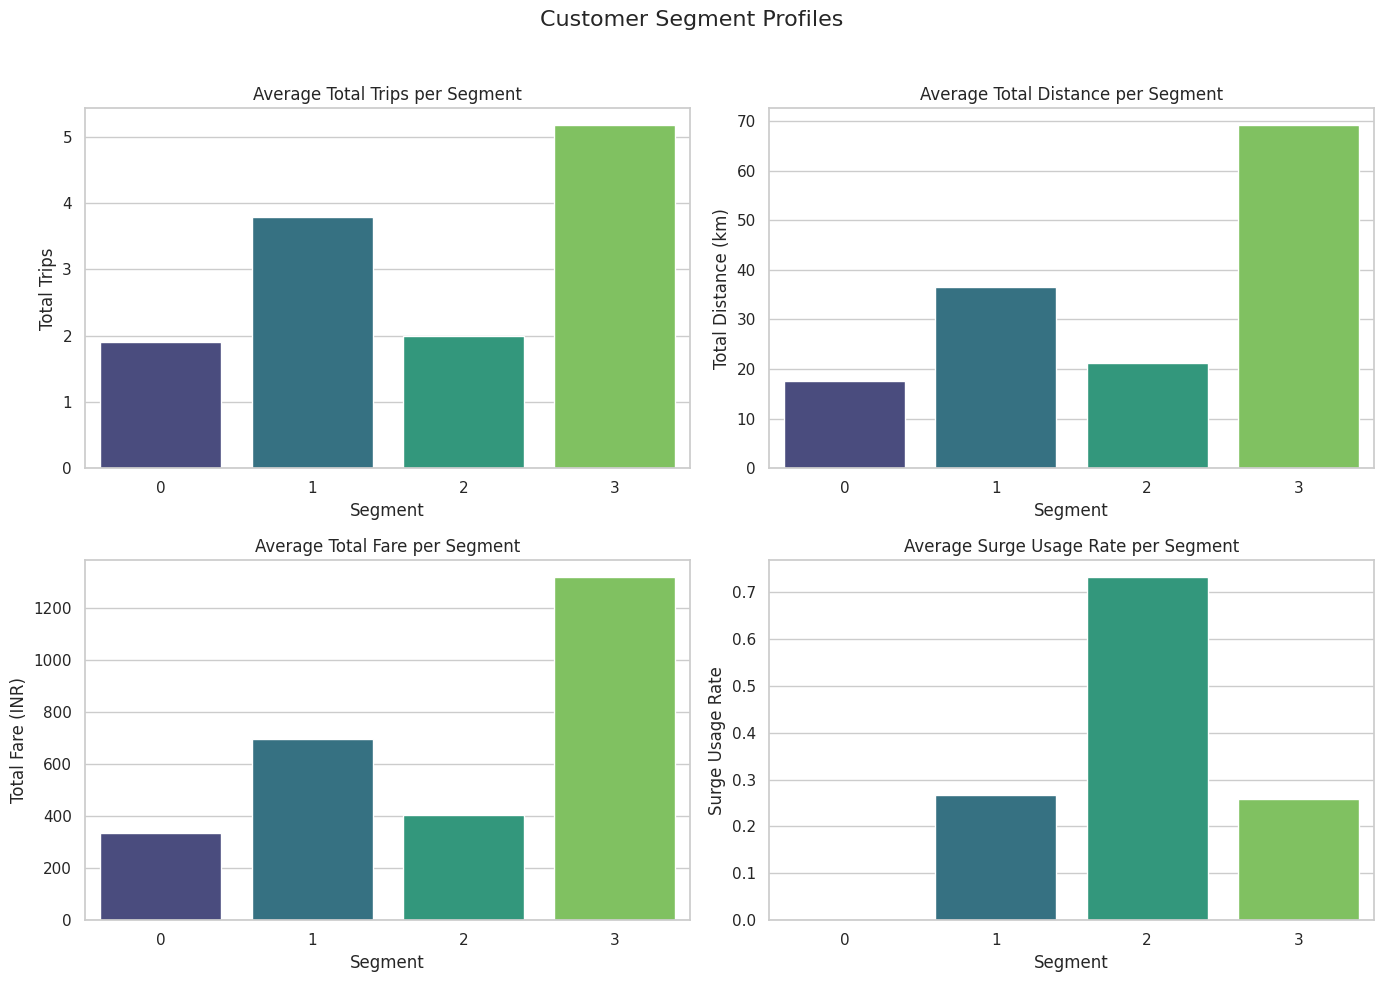

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Customer Segment Profiles', fontsize=16)

# Total Trips per Segment
sns.barplot(x=segment_profile.index, y='Total Trips', data=segment_profile, ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title('Average Total Trips per Segment')
axes[0, 0].set_xlabel('Segment')
axes[0, 0].set_ylabel('Total Trips')

# Total Distance per Segment
sns.barplot(x=segment_profile.index, y='Total Distance (km)', data=segment_profile, ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title('Average Total Distance per Segment')
axes[0, 1].set_xlabel('Segment')
axes[0, 1].set_ylabel('Total Distance (km)')

# Total Fare per Segment
sns.barplot(x=segment_profile.index, y='Total Fare (INR)', data=segment_profile, ax=axes[1, 0], palette="viridis")
axes[1, 0].set_title('Average Total Fare per Segment')
axes[1, 0].set_xlabel('Segment')
axes[1, 0].set_ylabel('Total Fare (INR)')

# Surge Usage Rate per Segment
sns.barplot(x=segment_profile.index, y='Surge Usage Rate', data=segment_profile, ax=axes[1, 1], palette="viridis")
axes[1, 1].set_title('Average Surge Usage Rate per Segment')
axes[1, 1].set_xlabel('Segment')
axes[1, 1].set_ylabel('Surge Usage Rate')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
